<a href="https://colab.research.google.com/github/Shubham2376G/trainingIBM/blob/main/Spam_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, f1_score, confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from wordcloud import WordCloud

In [2]:
# data from:
# https://www.kaggle.com/uciml/sms-spam-collection-dataset
!wget https://lazyprogrammer.me/course_files/spam.csv

--2024-04-28 21:43:53--  https://lazyprogrammer.me/course_files/spam.csv
Resolving lazyprogrammer.me (lazyprogrammer.me)... 104.21.23.210, 172.67.213.166, 2606:4700:3031::6815:17d2, ...
Connecting to lazyprogrammer.me (lazyprogrammer.me)|104.21.23.210|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 503663 (492K) [text/csv]
Saving to: ‘spam.csv.1’

spam.csv.1          100%[===================>] 491.86K  --.-KB/s    in 0.03s   

2024-04-28 21:43:53 (14.0 MB/s) - ‘spam.csv.1’ saved [503663/503663]



In [3]:
df = pd.read_csv('spam.csv', encoding='ISO-8859-1')

In [4]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [5]:
df["v1"]=df["v1"].replace("ham",1)

In [6]:
df["v1"]=df["v1"].replace("spam",0)

In [7]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,1,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,1,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,0,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,1,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,1,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [8]:
df=df.dropna(axis=1)

In [41]:
df.head()

,v1,v2
0,1,"Go until jurong point, crazy.. Available only ..."
1,1,Ok lar... Joking wif u oni...
2,0,Free entry in 2 a wkly comp to win FA Cup fina...
3,1,U dun say so early hor... U c already then say...
4,1,"Nah I don't think he goes to usf, he lives aro..."


<Axes: >

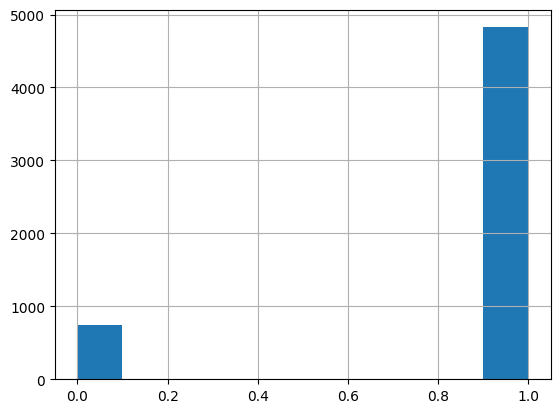

In [42]:
df['v1'].hist()

In [43]:
xtrain,xtest,ytrain,ytest=train_test_split(df["v2"],df["v1"],test_size=0.3,random_state=3)

<Axes: >

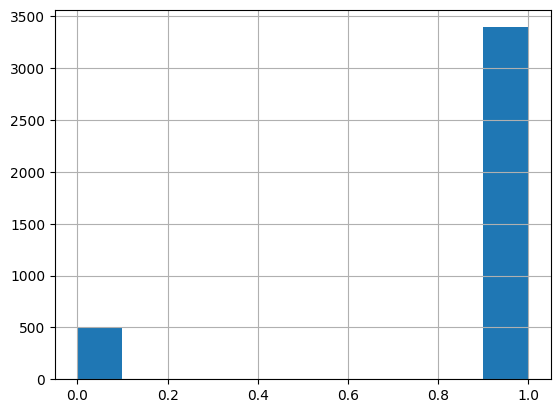

In [44]:
ytrain.hist()

In [45]:
xtrain.head()

1455    Summers finally here! Fancy a chat or flirt wi...
3460    K.. I yan jiu liao... Sat we can go 4 bugis vi...
2493    they released another Italian one today and it...
3378                      Dear umma she called me now :-)
3826    Congratulations U can claim 2 VIP row A Ticket...
Name: v2, dtype: object

In [46]:
import nltk

In [47]:
nltk.download("punkt")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [48]:
nltk.download("wordnet")

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [49]:
from nltk.corpus import wordnet

In [50]:
nltk.download("averaged_perceptron_tagger")

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [51]:
from nltk.stem import WordNetLemmatizer

In [52]:
def get_wordnet_pos(treebank_tag):
  if treebank_tag.startswith('J'):
    return wordnet.ADJ
  elif treebank_tag.startswith('V'):
    return wordnet.VERB
  elif treebank_tag.startswith('N'):
    return wordnet.NOUN
  elif treebank_tag.startswith('R'):
    return wordnet.ADV
  else:
    return wordnet.NOUN

In [53]:
from nltk import word_tokenize

In [54]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [55]:
class LemmaTokenizer:
  def __init__(self):
    self.wnl = WordNetLemmatizer()
  def __call__(self, doc):
    tokens = word_tokenize(doc)
    words_and_tags = nltk.pos_tag(tokens)
    return [self.wnl.lemmatize(word, pos=get_wordnet_pos(tag)) \
            for word, tag in words_and_tags]

In [56]:
vectorizer=TfidfVectorizer(lowercase=True,tokenizer=LemmaTokenizer())

In [57]:
xtrain=vectorizer.fit_transform(xtrain)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [58]:
xtest=vectorizer.transform(xtest)

In [59]:
model=MultinomialNB()

In [60]:
from imblearn.over_sampling import SMOTE

# ... (Load your data X and labels y)

# Define an SMOTE object with sample_size
smote = SMOTE(random_state=42, sampling_strategy=0.5)

# Oversample the minority class
X_resampled, y_resampled = smote.fit_resample(xtrain,ytrain)


<Axes: >

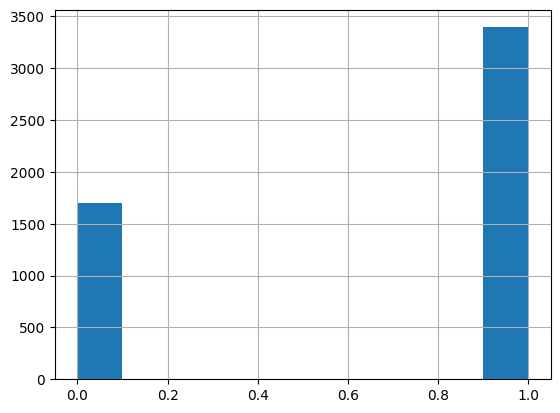

In [61]:
y_resampled.hist()

In [62]:
model.fit(X_resampled, y_resampled)

MultinomialNB()

In [63]:
model.score(X_resampled, y_resampled)

0.9876325088339223

In [64]:
model.score(xtest,ytest)

0.9820574162679426